# Working with Machine Learning techniques in NLP:

### - Importing the Dependencies
### - Uploading dataset and mounting the drive:
### - Data Pre-processing:
### - Numerical Representation:
### - Machine Learning Models
- Logistic Regression model:
- Decision Tree model
- Support Vector Machine model 
- Random Forest model
- Naive Bayes model
- K Nearest Neighbour KNN
### - Comparison of models





# **Importing the Dependencies:**

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')
# printing the stopwords in English
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

# **Uploading Dataset and mounting the drive:**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/drive/MyDrive/train.csv')

Mounted at /content/drive


In [4]:
news_dataset.shape

(20800, 5)

In [5]:
# print the first 5 rows of the dataframe
news_dataset.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [6]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')


# **Data Pre-processing:**

In [7]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [8]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

### **Stemming:**



In [9]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [10]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [11]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [12]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [13]:
print(Y)

[1 0 1 ... 0 1 1]


In [14]:
Y.shape

(20800,)

# **Numerical Representation:**

In [15]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [16]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# **Machine Learning Models**



### **Logistic Regression Model:**

In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### **Logistic Regression Prediction:**

In [19]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
acc_logr = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', acc_logr)

Accuracy score of the test data :  0.9790865384615385


### **Decision Tree Model:**

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

### **Decision Tree Prediction:**

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
y_pred = tree_model.predict(X_test)
test = np.array(Y_test)
predictions = np.array(y_pred)
confusion_matrix(test, predictions)

print('accuracy:', accuracy_score(Y_test,y_pred))
print('f1-score:', f1_score(Y_test,y_pred))

acc_tree = accuracy_score(Y_test,y_pred)

accuracy: 0.9322115384615385
f1-score: 0.9364864864864865


### **Support Vector Machine Model:**

In [24]:
from sklearn import svm
model = svm.SVC(kernel='linear', gamma=1) 
model.fit(X_train, Y_train)

SVC(gamma=1, kernel='linear')

### **SVM Predictions:**

In [25]:
y_pred_svm= model.predict(X_test)
print('accuracy:', accuracy_score(Y_test,y_pred_svm))
print('f1-score:', f1_score(Y_test,y_pred_svm))

acc_svm = accuracy_score(Y_test,y_pred_svm)

accuracy: 0.9913461538461539
f1-score: 0.9913669064748201


### **Random Forest Model:**

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier (criterion='gini',
                                n_estimators=12, 
                                random_state=1)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=12, random_state=1)

### **Random Forest Predictions:**

In [27]:
y_pred_forest= forest.predict(X_test)
print('accuracy:', accuracy_score(Y_test,y_pred_forest))
print('f1-score:', f1_score(Y_test,y_pred_forest))

acc_rf = accuracy_score(Y_test,y_pred_forest)

accuracy: 0.9899038461538462
f1-score: 0.9899038461538462


### **Naive Bayes Model:**

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

### **Naive Bayes Predictions:**

In [29]:
y_pred_nb= nb.predict(X_test)
print('accuracy:', accuracy_score(Y_test,y_pred_nb))
print('f1-score:', f1_score(Y_test,y_pred_nb))

acc_nb = accuracy_score(Y_test,y_pred_nb)

accuracy: 0.9550480769230769
f1-score: 0.9533083645443196


### **KNN Model:**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

### **KNN Predictions:**

In [31]:
y_pred_knn= knn.predict(X_test)
print('accuracy:', accuracy_score(Y_test,y_pred_knn))
print('f1-score:', f1_score(Y_test,y_pred_knn))
acc_knn = accuracy_score(Y_test,y_pred_knn)

accuracy: 0.5865384615384616
f1-score: 0.7077811756710839


### **Comparison of Models:**

In [32]:
models = ['DesicionTree','LogReg','SVM', 'RandomForest', 'NaiveBayes', 'kNN']
col = [acc_tree, acc_logr, acc_svm, acc_rf, acc_nb, acc_knn]
data = {'Models':models,'Accuracy':col}
graph_df = pd.DataFrame(data)
graph_df

Models  Accuracy
0  DesicionTree  0.932212
1        LogReg  0.979087
2           SVM  0.991346
3  RandomForest  0.989904
4    NaiveBayes  0.955048
5           kNN  0.586538

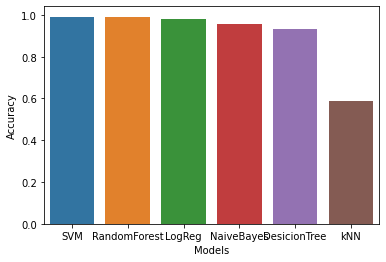

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
graph_df = graph_df.sort_values(by=['Accuracy'], axis = 0, ascending=False)
fig, ax = plt.subplots()
sns.barplot(x=graph_df['Models'], y=graph_df['Accuracy'], data=graph_df);